# Stock Market Analysis Notebook (SMAN) Run Through

You can find this reference notebook [here](https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook)

## Objectives

1.) What was the change in price of the stock over time?  
2.) What was the daily return of the stock on average?  
3.) What was the moving average of the various stocks?  
4.) What was the correlation between different stocks'?  
5.) How much value do we put at risk by investing in a particular stock?  
6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

## List of my questions you can find in the file:

1.) What do the column names - Open, High, Low, Close, Adj Close, Volume - all mean?  
2.) Why do we have missing data in our company dataset when we add the moving averages?

## 1.) What was the change in price of the stock over time? 

In [ ]:
# pip install packages that aren't already installed
# !pip install pandas_datareader
# !pip install yfinance
!pip install keras
!pip install tensorflow

# import dependencies
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# for reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf # a means to access the financial data available on Yahoo Finance

# for time stamps
from datetime import datetime

The tech stocks we'll be looking at are:

- Apple (AAPL)
- Google (GOOG)
- Microsoft (MSFT)
- Amazon (AMZN)

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now() # gives current month, day, year, time

start = datetime(end.year - 1, end.month, end.day) # last year, this month, this day

# for each stock company in the tech list:
for stock in tech_list:
    # globals() is a method that returns a dict with all the global variables and symbols for the current program
    # note that using globals() is a sloppy way of setting the DataFrame names, but its simple
    # set the stock variable of globals to 
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
globals()[stock]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-25 00:00:00-04:00,166.750000,167.389999,164.884995,166.018494,166.018494,44520000
2021-10-26 00:00:00-04:00,167.475494,170.806000,167.199005,168.803497,168.803497,53966000
2021-10-27 00:00:00-04:00,169.399994,171.850006,168.572495,169.624496,169.624496,54044000
2021-10-28 00:00:00-04:00,170.104996,173.949997,169.300003,172.328506,172.328506,114174000
2021-10-29 00:00:00-04:00,165.001007,168.740997,163.666000,168.621506,168.621506,129722000
...,...,...,...,...,...,...
2022-10-18 00:00:00-04:00,119.059998,119.519997,114.790001,116.360001,116.360001,65607400
2022-10-19 00:00:00-04:00,114.709999,116.589996,113.220001,115.070000,115.070000,47198100
2022-10-20 00:00:00-04:00,113.830002,118.239998,113.510002,115.250000,115.250000,48795100


In [4]:
globals()[stock].dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

__Do we know what each of these columns in the dataframe mean?__

In [5]:
# define company list and names
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# for each company, add the company name to the stock data
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-11 00:00:00-04:00,112.709999,115.480003,110.389999,112.209999,112.209999,56432200,AMAZON
2022-10-12 00:00:00-04:00,112.489998,113.830002,111.400002,112.900002,112.900002,45728700,AMAZON
2022-10-13 00:00:00-04:00,107.879997,113.440002,105.349998,112.529999,112.529999,86868100,AMAZON
2022-10-14 00:00:00-04:00,114.099998,114.959999,106.599998,106.900002,106.900002,67651200,AMAZON
2022-10-17 00:00:00-04:00,110.110001,114.190002,110.089996,113.790001,113.790001,62782000,AMAZON
2022-10-18 00:00:00-04:00,119.059998,119.519997,114.790001,116.360001,116.360001,65607400,AMAZON
2022-10-19 00:00:00-04:00,114.709999,116.589996,113.220001,115.070000,115.070000,47198100,AMAZON
2022-10-20 00:00:00-04:00,113.830002,118.239998,113.510002,115.250000,115.250000,48795100,AMAZON
2022-10-21 00:00:00-04:00,114.790001,119.589996,114.500000,119.320000,119.320000,55611900,AMAZON


In [6]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-10-25 00:00:00-04:00,148.679993,149.369995,147.619995,148.639999,147.811737,50720600,APPLE
2021-10-26 00:00:00-04:00,149.330002,150.839996,149.009995,149.320007,148.487946,60893400,APPLE
2021-10-27 00:00:00-04:00,149.360001,149.729996,148.490005,148.850006,148.020569,56094900,APPLE
2021-10-28 00:00:00-04:00,149.820007,153.169998,149.720001,152.570007,151.719833,100077900,APPLE
2021-10-29 00:00:00-04:00,147.220001,149.940002,146.410004,149.800003,148.965256,124953200,APPLE


In [7]:
# verify the type
type(AAPL)

pandas.core.frame.DataFrame

In [8]:
# print out the dataframe
AAPL

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-10-25 00:00:00-04:00,148.679993,149.369995,147.619995,148.639999,147.811737,50720600,APPLE
2021-10-26 00:00:00-04:00,149.330002,150.839996,149.009995,149.320007,148.487946,60893400,APPLE
2021-10-27 00:00:00-04:00,149.360001,149.729996,148.490005,148.850006,148.020569,56094900,APPLE
2021-10-28 00:00:00-04:00,149.820007,153.169998,149.720001,152.570007,151.719833,100077900,APPLE
2021-10-29 00:00:00-04:00,147.220001,149.940002,146.410004,149.800003,148.965256,124953200,APPLE
...,...,...,...,...,...,...,...
2022-10-18 00:00:00-04:00,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,APPLE
2022-10-19 00:00:00-04:00,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,APPLE
2022-10-20 00:00:00-04:00,143.020004,145.889999,142.649994,143.389999,143.389999,64522000,APPLE


In [9]:
# summary stats
aapl_ss = AAPL.describe()
aapl_ss

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,158.348651,160.512103,156.436032,158.558016,158.189952,8.991241e+07
std,12.567841,12.400685,12.498379,12.440465,12.305729,2.641862e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,4.100000e+07
25%,148.674995,150.204998,146.897503,148.932507,148.503723,7.115210e+07
50%,159.580002,161.970001,156.625000,159.260002,158.877831,8.508735e+07
75%,169.232502,171.057503,167.220001,168.970005,168.630119,1.024875e+08
max,182.630005,182.940002,179.119995,182.009995,181.259918,1.954327e+08


In [10]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-10-25 00:00:00-04:00 to 2022-10-24 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


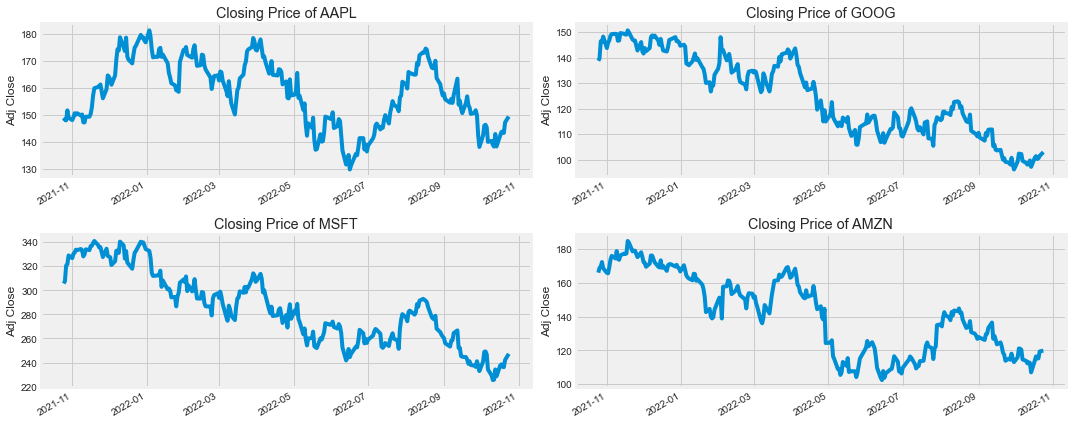

In [11]:
# Let's see a historical view of the closing price

# fig sizes
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

# plot for each company
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    # plot the adjusted close on the y-axis
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

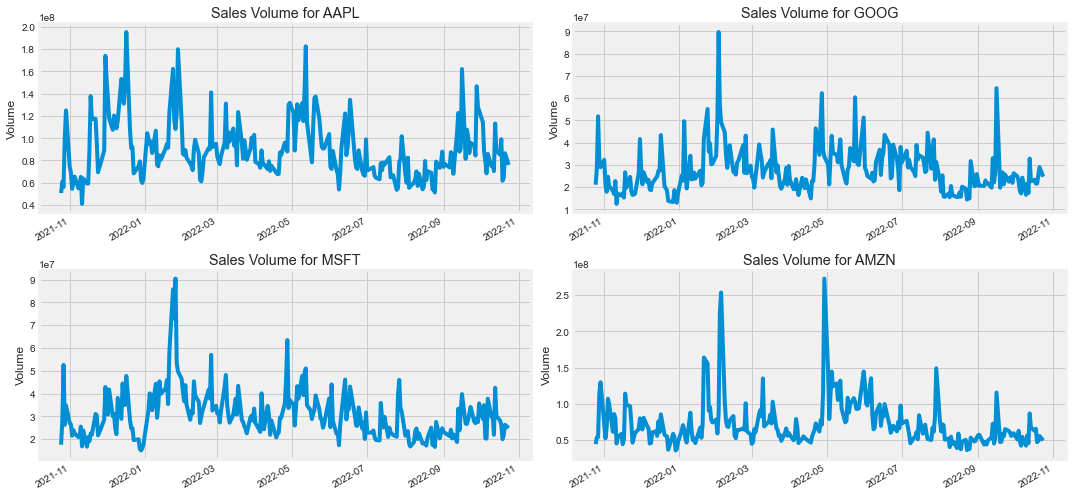

In [12]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

# for each company
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    # create a volumne plot on the y-axis
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## 2.) What was the moving average of the various stocks?

#### Moving Average

A moving average shows an average of data points (usually price data) for a certain number of time periods. 

It is “moving” because each data point is calculated using data from the previous X number of time periods. By averaging prior data, moving averages smooth the price data to form a trend following indicator. They do not predict price direction, but rather define the current direction, though they lag due to being based on past prices. Despite this, moving averages help smooth price action and filter out the noise.

These moving averages can be used to identify the direction of the trend or define potential support and resistance levels.

In [13]:
# define moving average list
ma_day = [10, 20, 50]

# for each moving average in the list
for ma in ma_day:
    # for each company in the list
    for company in company_list:
        # create column name
        column_name = f"MA for {ma} days"
        # set column name in company dataset
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [14]:
company

,Open,High,Low,Close,Adj Close,Volume,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2021-10-25 00:00:00-04:00,166.750000,167.389999,164.884995,166.018494,166.018494,44520000,AMAZON,NaN,NaN,NaN
2021-10-26 00:00:00-04:00,167.475494,170.806000,167.199005,168.803497,168.803497,53966000,AMAZON,NaN,NaN,NaN
2021-10-27 00:00:00-04:00,169.399994,171.850006,168.572495,169.624496,169.624496,54044000,AMAZON,NaN,NaN,NaN
2021-10-28 00:00:00-04:00,170.104996,173.949997,169.300003,172.328506,172.328506,114174000,AMAZON,NaN,NaN,NaN
2021-10-29 00:00:00-04:00,165.001007,168.740997,163.666000,168.621506,168.621506,129722000,AMAZON,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-18 00:00:00-04:00,119.059998,119.519997,114.790001,116.360001,116.360001,65607400,AMAZON,114.417,115.3070,125.9578
2022-10-19 00:00:00-04:00,114.709999,116.589996,113.220001,115.070000,115.070000,47198100,AMAZON,113.829,115.1335,125.5026
2022-10-20 00:00:00-04:00,113.830002,118.239998,113.510002,115.250000,115.250000,48795100,AMAZON,113.324,115.0305,124.9538


We can see that the company dataset has a lot of missing values for the new columns we just added so let's investigate that

In [15]:
company.isna().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
company_name       0
MA for 10 days     9
MA for 20 days    19
MA for 50 days    49
dtype: int64

That's a lot of missing data.  

__Why is there so much missing data when we add it? Was it our fault in the code or what?__

In [16]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-10-25 00:00:00-04:00,148.679993,149.369995,147.619995,148.639999,147.811737,50720600,APPLE
2021-10-26 00:00:00-04:00,149.330002,150.839996,149.009995,149.320007,148.487946,60893400,APPLE
2021-10-27 00:00:00-04:00,149.360001,149.729996,148.490005,148.850006,148.020569,56094900,APPLE
2021-10-28 00:00:00-04:00,149.820007,153.169998,149.720001,152.570007,151.719833,100077900,APPLE
2021-10-29 00:00:00-04:00,147.220001,149.940002,146.410004,149.800003,148.965256,124953200,APPLE
...,...,...,...,...,...,...,...
2022-10-18 00:00:00-04:00,119.059998,119.519997,114.790001,116.360001,116.360001,65607400,AMAZON
2022-10-19 00:00:00-04:00,114.709999,116.589996,113.220001,115.070000,115.070000,47198100,AMAZON
2022-10-20 00:00:00-04:00,113.830002,118.239998,113.510002,115.250000,115.250000,48795100,AMAZON


Remember which companies we're looking at before we run the plots below

In [17]:
df.company_name.unique()

array(['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'], dtype=object)

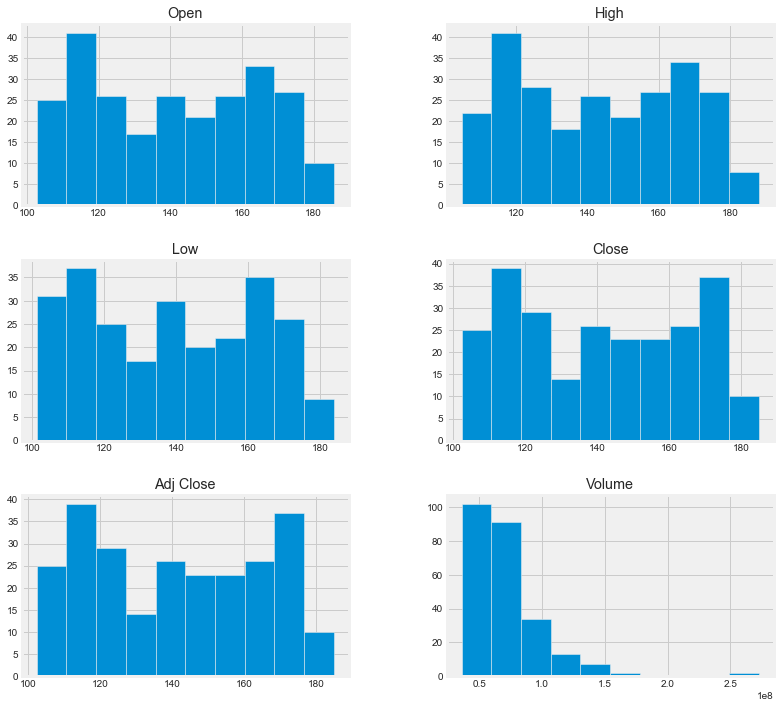

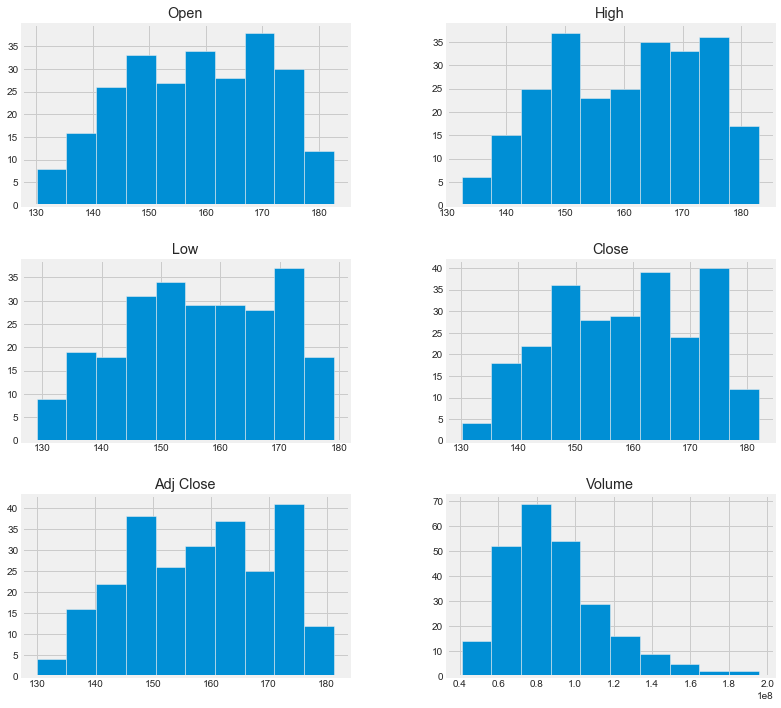

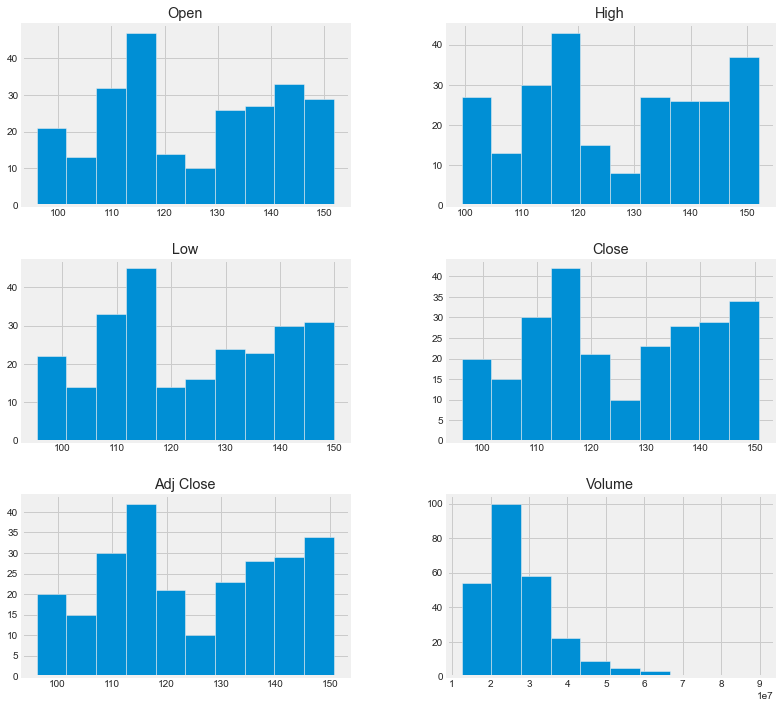

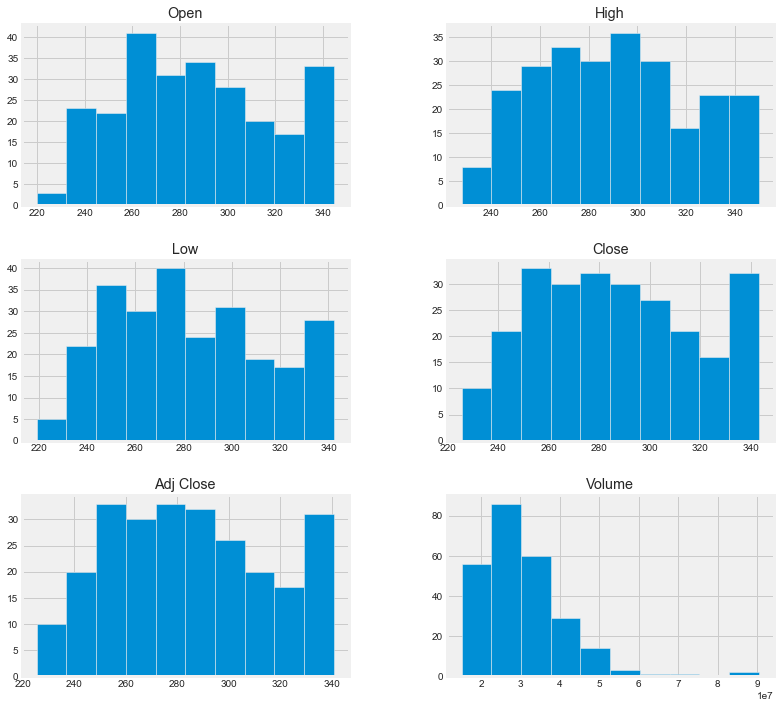

In [18]:
# group the dataframe by company name and create a hist for each 
df.groupby("company_name").hist(figsize=(12, 12));

# order is APPLE, GOOGLE, MICROSOFT, AMAZON

It would be an improvement to use seaborn here because we could color by company name instead of having to distinguish each ourselves.  

While we have the plots us, we can make some observations:
- Volume decreases for each company
- ... I don't want to look at these rn lol. I'll come back

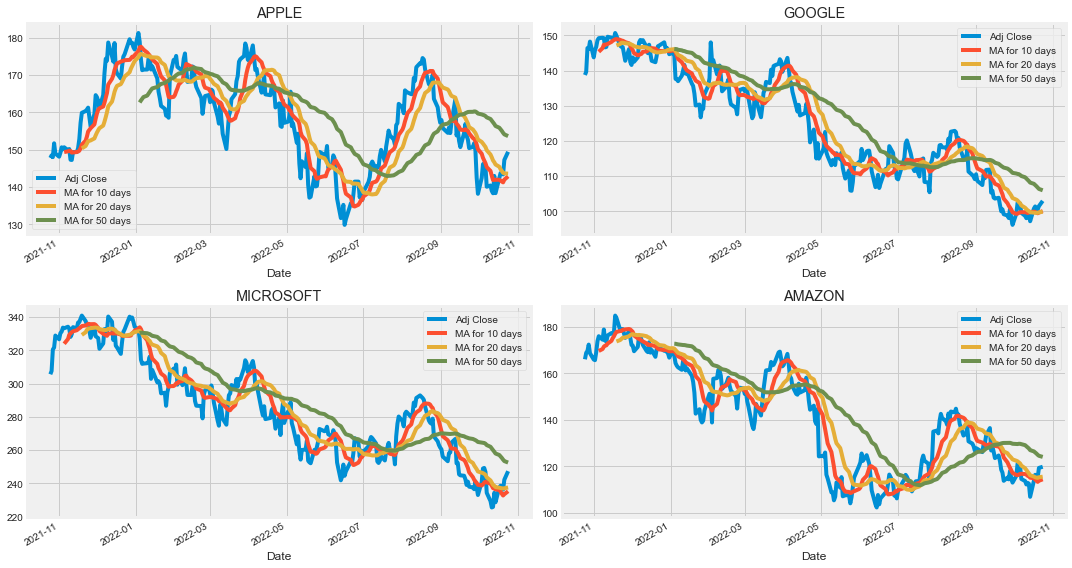

In [19]:
# set plot attributes
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

# for APPLE, select columns 'Adj Close', 'MA for 10 days', 'MA for 20 days', and 'MA for 50 days'
# plot each with dif colors and company name as title
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

# for GOOGLE, select columns 'Adj Close', 'MA for 10 days', 'MA for 20 days', and 'MA for 50 days'
# plot each with dif colors and company name as title
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

# for MICROSOFT, select columns 'Adj Close', 'MA for 10 days', 'MA for 20 days', and 'MA for 50 days'
# plot each with dif colors and company name as title
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

# for AMAZON, select columns 'Adj Close', 'MA for 10 days', 'MA for 20 days', and 'MA for 50 days'
# plot each with dif colors and company name as title
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

General: All columns included follow a similar pattern except for 'MA for 50 days'. All show a general decrease in the columns over time with positive jumps around November of 2021, and May and September of 2022. Height for each is around January of 2021. Of course barring time before 2021 since we don't have that data. 

APPLE has the steepest rise in 'MA for 50 days' after the dip in July of 2022, and AMAZON has the steepest dip leadin up to its low in July of 2022. 

## 3.) What was the daily return of the stock on average?

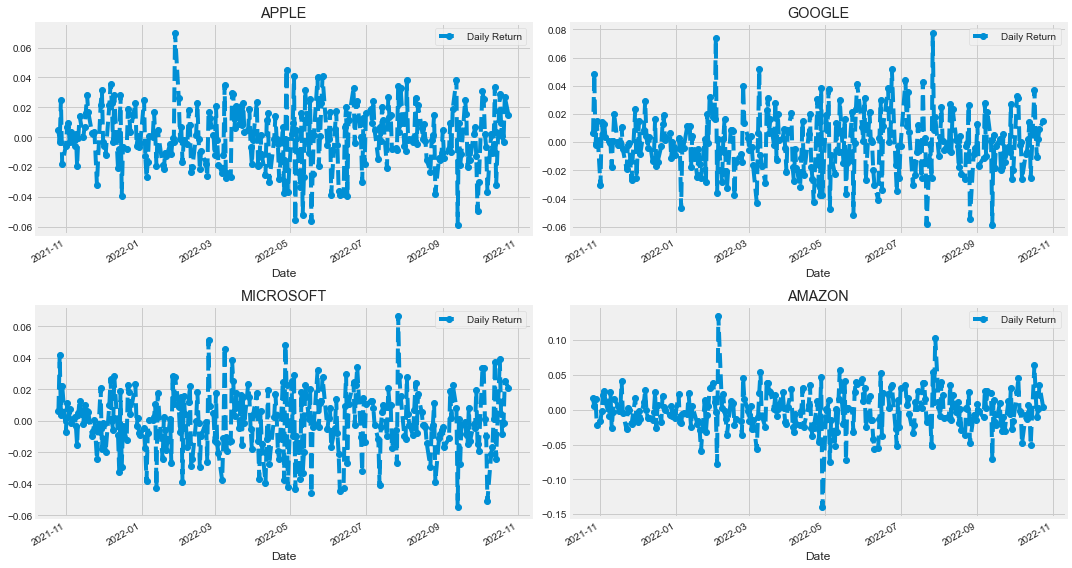

In [20]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

# select and plot 'Daily Return' for each company
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

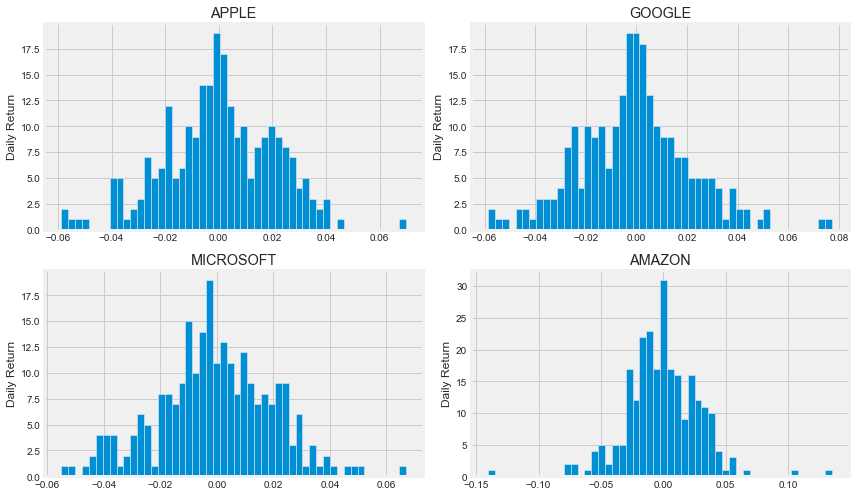

In [21]:
# set figure size
plt.figure(figsize=(12, 7))

# The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object. 
# The enumerate() function adds a counter as the key of the enumerate object.
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [22]:
# I've never run across enumerate() before so I looked up an example
l1 = ["eat", "sleep", "repeat"]
s1 = "geek"
  
# creating enumerate objects
# enumerate(iterable, start=0)
obj1 = enumerate(l1)
obj2 = enumerate(s1)
  
print (list(enumerate(l1)))
  
# changing start index to 2 from 0
print (list(enumerate(s1, 2)))

[(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
[(2, 'g'), (3, 'e'), (4, 'e'), (5, 'k')]


## 4.) What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the `[Close]` columns for each of the stocks dataframes.

In [23]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-10-25,147.811722,138.772995,305.570831,166.018494
2021-10-26,148.487961,139.671997,307.534363,168.803497
2021-10-27,148.020569,146.427505,320.485931,169.624496
2021-10-28,151.719833,146.128998,321.656097,172.328506
2021-10-29,148.965271,148.270493,328.865723,168.621506


In [24]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-10-25,NaN,NaN,NaN,NaN
2021-10-26,0.004575,0.006478,0.006426,0.016775
2021-10-27,-0.003148,0.048367,0.042114,0.004864
2021-10-28,0.024992,-0.002039,0.003651,0.015941
2021-10-29,-0.018156,0.014655,0.022414,-0.021511


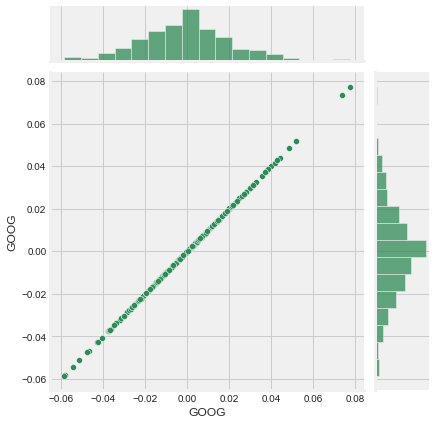

In [25]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen');

Obviously because it's with itself

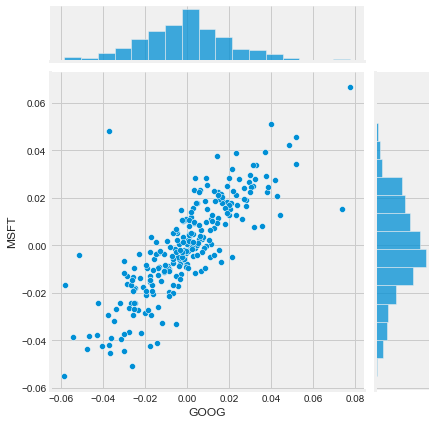

In [26]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter');

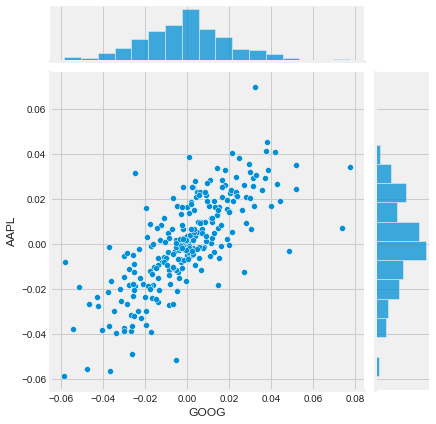

In [27]:
# We'll use joinplot to compare the daily returns of Google and Apple
sns.jointplot(x='GOOG', y='AAPL', data=tech_rets, kind='scatter');

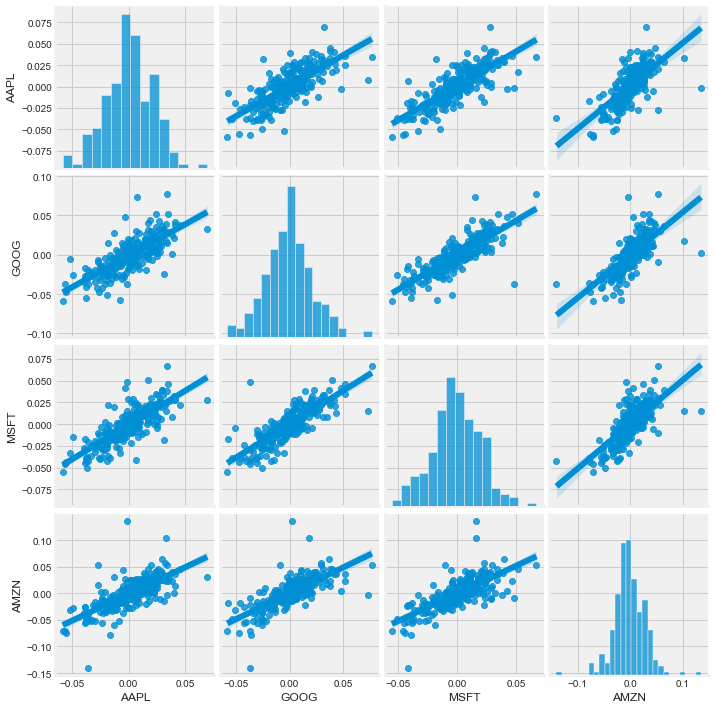

In [28]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg');

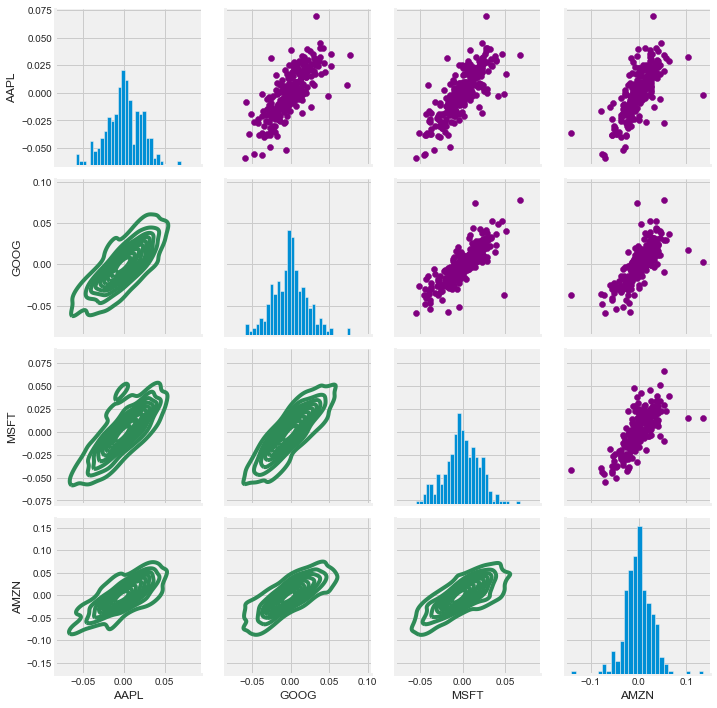

In [29]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, color='seagreen')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

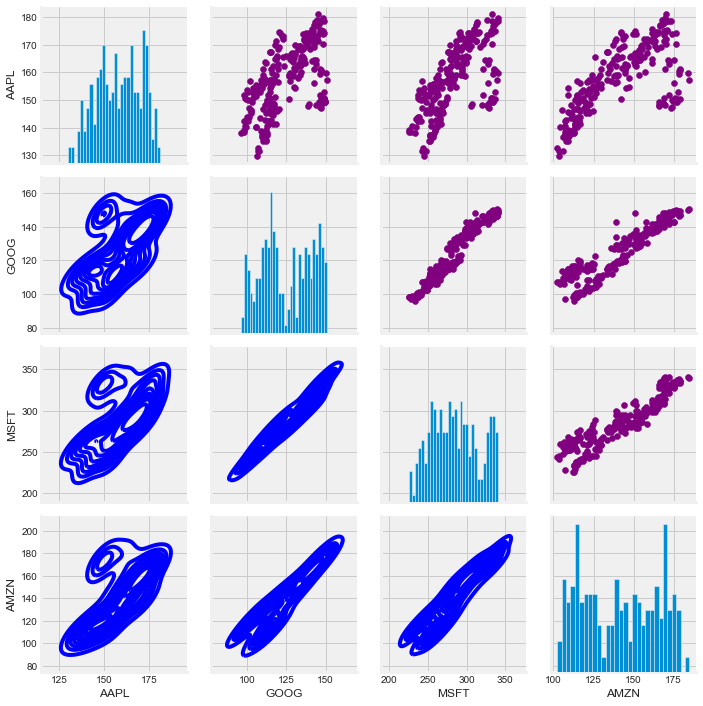

In [30]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,color='blue')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

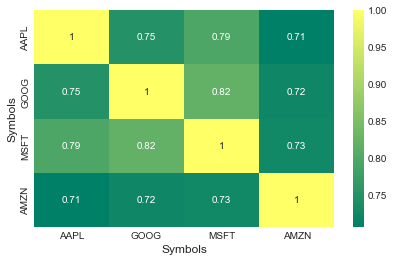

In [31]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

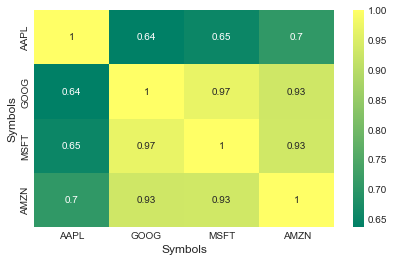

In [32]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

## 5.) How much value do we put at risk by investing in a particular stock?

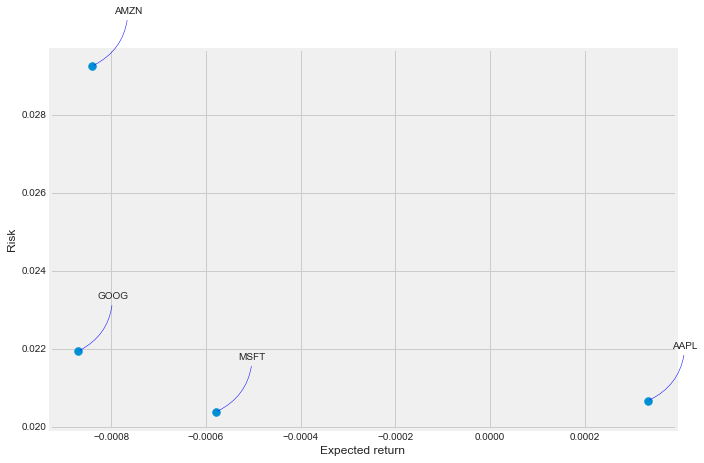

In [33]:
# Let's start by defining a new DataFrame as a clenaed version of the orignal tech_rets DataFrame
rets = tech_rets.dropna() 

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [34]:
rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-10-26,0.004575,0.006478,0.006426,0.016775
2021-10-27,-0.003148,0.048367,0.042114,0.004864
2021-10-28,0.024992,-0.002039,0.003651,0.015941
2021-10-29,-0.018156,0.014655,0.022414,-0.021511
2021-11-01,-0.005607,-0.030326,-0.006785,-0.016107
...,...,...,...,...
2022-10-19,0.000765,-0.010849,-0.008470,-0.011086
2022-10-20,-0.003267,0.002393,-0.001395,0.001564
2022-10-21,0.027059,0.009450,0.025281,0.035315


## 5.) Predicting the Closing Stock Price of Apple Inc.

In [35]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540047
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607436
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747406
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880663
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860233
...,...,...,...,...,...,...
2022-10-19,144.949997,141.500000,141.690002,143.860001,61758300.0,143.860001
2022-10-20,145.889999,142.649994,143.020004,143.389999,64522000.0,143.389999
2022-10-21,147.850006,142.649994,142.869995,147.270004,86464700.0,147.270004


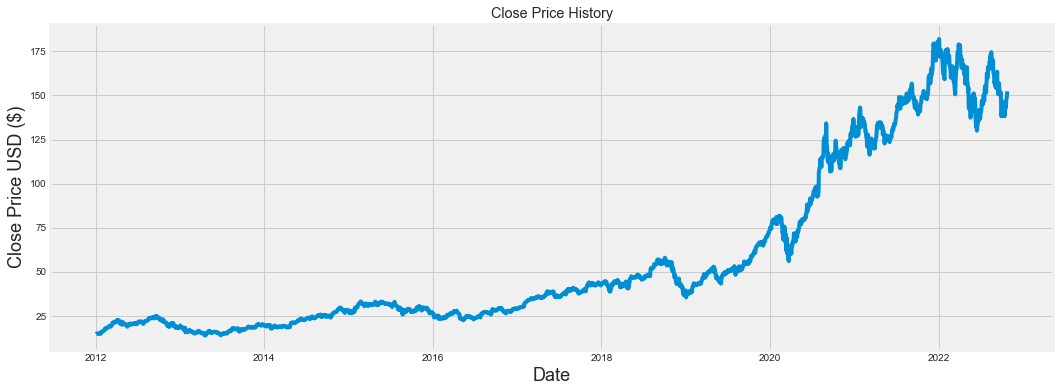

In [36]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [37]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2586

In [38]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.79329124],
       [0.80626256],
       [0.82345854]])

In [39]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid